In [13]:
directory = './EmoDB_dataset/wav'

# CSV creation for mapping

In [16]:
import os
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Emotion mapping based on file naming convention
EMOTION_MAP = {
    'W': 'Anger',
    'L': 'Boredom',
    'E': 'Disgust',
    'A': 'Anxiety/Fear',
    'F': 'Happiness',
    'T': 'Sadness',
    'N': 'Neutral'
}

# Numeric encoding for emotions
EMOTION_NUMERIC = {emotion: idx for idx, emotion in enumerate(EMOTION_MAP.values())}

# Speaker Information mapping
SPEAKER_INFO = {
    '03': ('Male', 31),
    '08': ('Female', 34),
    '09': ('Female', 21),
    '10': ('Male', 32),
    '11': ('Male', 26),
    '12': ('Male', 30),
    '13': ('Female', 32),
    '14': ('Female', 35),
    '15': ('Male', 25),
    '16': ('Female', 31)
}

def parse_filename(filename: str):
    """
    Parse the filename and extract relevant information.
    """
    speaker_id = filename[:2]
    text_code = filename[2:5]
    emotion_code = filename[5]
    version = filename[6] if len(filename) > 6 and filename[6].isalpha() else 'a'

    speaker_info = SPEAKER_INFO.get(speaker_id, ('Unknown', 'Unknown'))
    emotion = EMOTION_MAP.get(emotion_code, 'Unknown')
    emotion_numeric = EMOTION_NUMERIC.get(emotion, -1)

    return {
        'Filename': filename,
        'Speaker ID': speaker_id,
        'Speaker Gender': speaker_info[0],
        'Speaker Age': speaker_info[1],
        'Text Code': text_code,
        'Emotion Code': emotion_code,
        'Emotion (English)': emotion,
        'Emotion Numeric': emotion_numeric,
        'Version': version
    }

def create_detailed_mapping_csv(directory: str, output_file: str = 'emotion_mapping_detailed.csv') -> None:
    """
    Creates a CSV file with detailed mapping of audio files.
    """
    data = []

    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_info = parse_filename(filename)
            data.append(file_info)

    # Convert to DataFrame and save to CSV
    df = pd.DataFrame(data)
    df.to_csv(output_file, index=False)
    print(f"CSV file '{output_file}' created successfully.")


In [17]:
create_detailed_mapping_csv(directory)

CSV file 'emotion_mapping_detailed.csv' created successfully.


# Histogram of durations

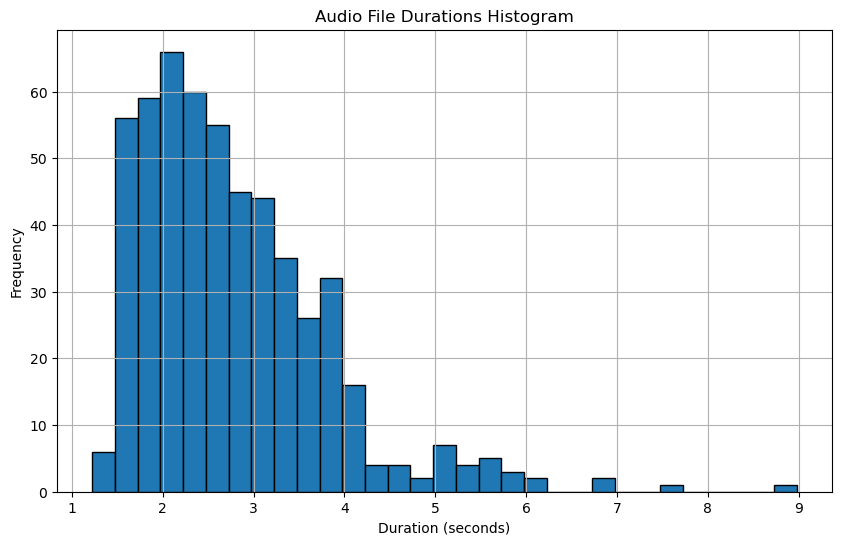

In [1]:
import os
import wave
import contextlib
import matplotlib.pyplot as plt
from typing import List


def get_audio_durations(directory: str) -> List[float]:
    durations = []
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)
            with contextlib.closing(wave.open(file_path, 'r')) as f:
                frames = f.getnframes()
                rate = f.getframerate()
                duration = frames / float(rate)
                durations.append(duration)
    return durations


def plot_histogram(durations: List[float], bin_width: float = 1.0):
    plt.figure(figsize=(10, 6))
    plt.hist(durations, bins=int((max(durations) - min(durations)) / bin_width), edgecolor='black')
    plt.title('Audio File Durations Histogram')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



bin_width = 0.25

durations = get_audio_durations(directory)
if not durations:
    print('No .wav files found in the specified directory.')
    return

plot_histogram(durations, bin_width)


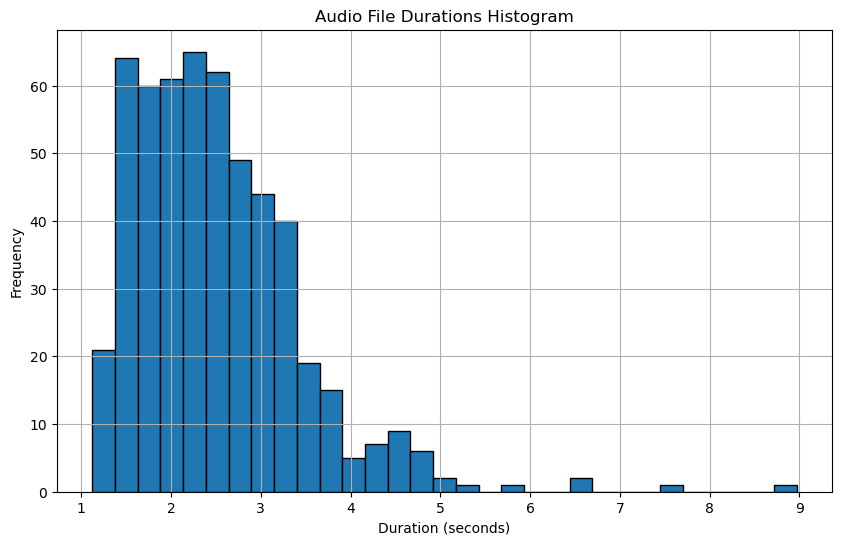

In [3]:
import os
import wave
import contextlib
import matplotlib.pyplot as plt
from typing import List


def get_audio_durations(directory: str) -> List[float]:
    durations = []
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory, filename)
            with contextlib.closing(wave.open(file_path, 'r')) as f:
                frames = f.getnframes()
                rate = f.getframerate()
                duration = frames / float(rate)
                durations.append(duration)
    return durations


def plot_histogram(durations: List[float], bin_width: float = 1.0):
    plt.figure(figsize=(10, 6))
    plt.hist(durations, bins=int((max(durations) - min(durations)) / bin_width), edgecolor='black')
    plt.title('Audio File Durations Histogram')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



bin_width = 0.25

durations = get_audio_durations('./EmoDB_dataset/silenceRemoved')

plot_histogram(durations, bin_width)
